### **Descripcion**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
SMART_GEP_Procurement = pd.read_csv('./data/SMART_GEP_Procurement.csv')
target_process = pd.read_csv('./data/TARGET_PROCESS_Hours.csv')

In [26]:
display(SMART_GEP_Procurement.describe(include='all'))
display(target_process.describe(include='all') )

,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Contract_Status,Start_Date,End_Date,Overrun,Overrun_Amount_USD,Overrun_Pct,Status_Clean,Is_Overrun_Status
count,2000,2000,2000,2000.000000,2.000000e+03,2000,2000,2000,2000,2000.000000,2000.000000,2000,2000
unique,2000,10,9,NaN,NaN,3,NaN,NaN,2,NaN,NaN,2,2
top,C-1001,Deloitte,Cloud Services,NaN,NaN,Active,NaN,NaN,False,NaN,NaN,Active,False
freq,1,216,242,NaN,NaN,710,NaN,NaN,1002,NaN,NaN,1348,1362
mean,NaN,NaN,NaN,535263.121000,5.364371e+05,NaN,2023-06-29 20:16:04.800000,2024-06-28 09:37:26.400000,NaN,1173.937000,0.214359,NaN,NaN
min,NaN,NaN,NaN,50638.000000,4.087200e+04,NaN,2023-01-01 00:00:00,2024-01-01 00:00:00,NaN,-194083.000000,-19.999320,NaN,NaN
25%,NaN,NaN,NaN,298723.500000,2.922588e+05,NaN,2023-03-31 00:00:00,2024-03-26 18:00:00,NaN,-39721.500000,-9.547204,NaN,NaN
50%,NaN,NaN,NaN,540189.000000,5.399255e+05,NaN,2023-06-29 12:00:00,2024-06-27 00:00:00,NaN,-71.500000,-0.017578,NaN,NaN
75%,NaN,NaN,NaN,777261.000000,7.699192e+05,NaN,2023-09-28 00:00:00,2024-09-28 00:00:00,NaN,43839.250000,10.098466,NaN,NaN
max,NaN,NaN,NaN,999764.000000,1.194016e+06,NaN,2024-01-01 00:00:00,2025-01-01 00:00:00,NaN,195100.000000,19.967243,NaN,NaN


,Employee_ID,Project,Task_Type,Hours_Logged,Hourly_Rate,Cost_USD,Week
count,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,10,5,6,NaN,NaN,NaN,NaN
top,E010,Migration2024,Design,NaN,NaN,NaN,NaN
freq,216,428,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,27.408500,44.982500,1233.077500,27.033000
std,NaN,NaN,NaN,13.157819,10.011859,666.591414,15.351637
min,NaN,NaN,NaN,5.000000,30.000000,150.000000,1.000000
25%,NaN,NaN,NaN,16.000000,35.000000,675.000000,14.000000
50%,NaN,NaN,NaN,27.000000,45.000000,1165.000000,27.000000
75%,NaN,NaN,NaN,39.000000,55.000000,1680.000000,41.000000


### **SMART_GEP_Procurement**

In [6]:
# Convertir fechas a datetime
SMART_GEP_Procurement['Start_Date'] = pd.to_datetime(SMART_GEP_Procurement['Start_Date'])
SMART_GEP_Procurement['End_Date'] = pd.to_datetime(SMART_GEP_Procurement['End_Date'])

# Crear columnas útiles
SMART_GEP_Procurement['Overrun'] = SMART_GEP_Procurement['Invoiced_Amount_USD'] > SMART_GEP_Procurement['Approved_Amount_USD']
SMART_GEP_Procurement['Overrun_Amount_USD'] = SMART_GEP_Procurement['Invoiced_Amount_USD'] - SMART_GEP_Procurement['Approved_Amount_USD']
SMART_GEP_Procurement['Overrun_Pct'] = (SMART_GEP_Procurement['Overrun_Amount_USD'] / SMART_GEP_Procurement['Approved_Amount_USD']) * 100

# Limpiar estado del contrato
SMART_GEP_Procurement['Status_Clean'] = SMART_GEP_Procurement['Contract_Status'].str.replace(' (Overrun)', '', regex=False).str.strip()
SMART_GEP_Procurement['Is_Overrun_Status'] = SMART_GEP_Procurement['Contract_Status'].str.contains('Overrun')

# Mostrar las primeras filas y info general
print("Dataset cargado correctamente")
print(f"Filas: {SMART_GEP_Procurement.shape[0]}, Columnas: {SMART_GEP_Procurement.shape[1]}")
SMART_GEP_Procurement.head()

Dataset cargado correctamente
Filas: 2000, Columnas: 13


,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Contract_Status,Start_Date,End_Date,Overrun,Overrun_Amount_USD,Overrun_Pct,Status_Clean,Is_Overrun_Status
0,C-1001,PwC,IT Services,568373,617824,Active,2023-11-24,2024-03-04,True,49451,8.700448,Active,False
1,C-1002,EY,Cloud Support,241414,256710,Active,2023-09-08,2024-03-31,True,15296,6.336004,Active,False
2,C-1003,EY,Software Licensing,577948,541134,Active,2023-03-30,2024-12-08,False,-36814,-6.369777,Active,False
3,C-1004,Globant,Software Dev,713610,802654,Active (Overrun),2023-01-05,2024-08-22,True,89044,12.477964,Active,True
4,C-1005,IBM,ERP Implementation,928739,866319,Active,2023-06-15,2024-06-22,False,-62420,-6.720941,Active,False


**¿Cuáles contratos están excedidos? (Overrun)**

In [7]:
excedidos = SMART_GEP_Procurement[SMART_GEP_Procurement['Invoiced_Amount_USD'] > SMART_GEP_Procurement['Approved_Amount_USD']].copy()

excedidos = excedidos[['Contract_ID', 'Vendor', 'Category', 
                       'Approved_Amount_USD', 'Invoiced_Amount_USD', 
                       'Overrun_Amount_USD', 'Overrun_Pct', 'Contract_Status']]

excedidos = excedidos.sort_values('Overrun_Amount_USD', ascending=False)

print(f"Hay {len(excedidos)} contratos excedidos de {len(SMART_GEP_Procurement)} totales ({len(excedidos)/len(SMART_GEP_Procurement):.1%})")
excedidos.head(15)

Hay 998 contratos excedidos de 2000 totales (49.9%)


,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Overrun_Amount_USD,Overrun_Pct,Contract_Status
1623,C-2624,Globant,Software Dev,998916,1194016,195100,19.531172,Closed
1356,C-2357,Deloitte,Software Dev,986047,1180515,194468,19.721981,Active
760,C-1761,PwC,Consulting,981422,1175623,194201,19.787716,Active
243,C-1244,IBM,IT Services,988460,1178016,189556,19.176901,Active
1593,C-2594,IBM,Software Licensing,940364,1127673,187309,19.918776,Closed
497,C-1498,Deloitte,IT Services,959266,1145691,186425,19.434130,Active
774,C-1775,Globant,Consulting,970368,1155951,185583,19.125012,Active
1740,C-2741,EY,Finance Ops,990890,1170709,179819,18.147221,Active
1093,C-2094,Accenture,Cloud Support,999764,1177616,177852,17.789398,Active
1158,C-2159,SAP,Software Dev,958432,1135657,177225,18.491140,Active (Overrun)


**¿Cuál es el proveedor con mayor nivel de overrun?**

Proveedor con MAYOR overrun en dólares:


,Total_Overrun_USD,Avg_Overrun_Pct,Overrun_Contracts
Vendor,,,
Deloitte,6445982,10.27,113
Oracle,6432112,11.13,116
EY,5691997,9.54,102
SAP,5568322,9.73,101
Capgemini,5502860,11.36,91
PwC,5381393,10.71,91
IBM,5342997,9.96,104
Microsoft,4890215,10.15,102
Accenture,4805424,10.16,84


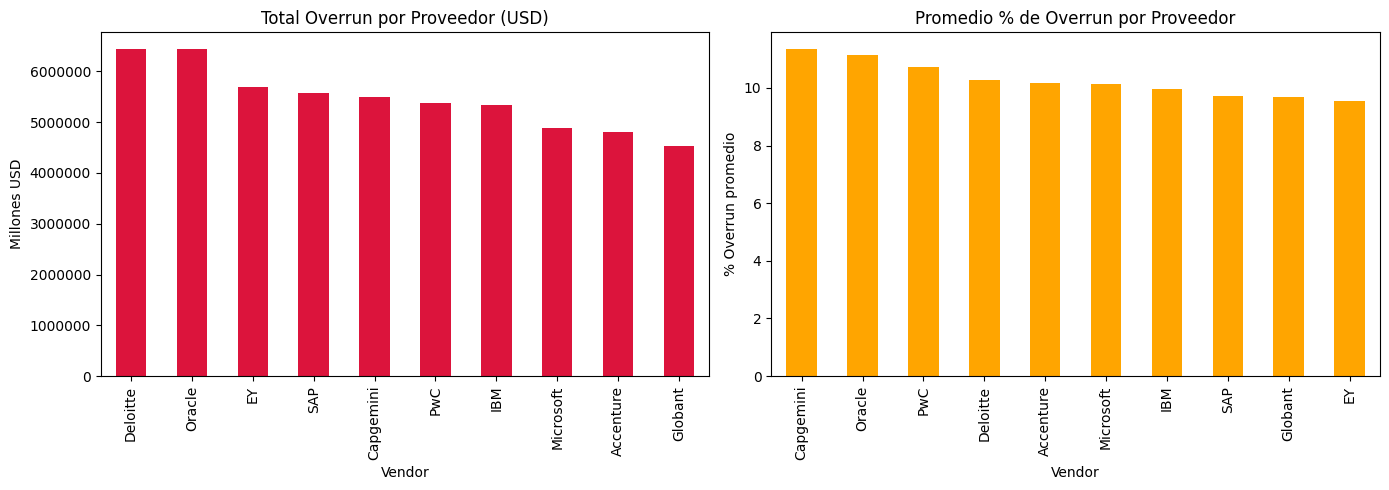


Proveedor con mayor overrun total: Deloitte → $6,445,982.0 USD excedidos


In [8]:
# CELDA 2: ¿Cuál es el proveedor con mayor nivel de overrun?
# (Analizamos tanto monto total excedido como % promedio de overrun)

overrun_by_vendor = SMART_GEP_Procurement[SMART_GEP_Procurement['Overrun']].groupby('Vendor').agg({
    'Overrun_Amount_USD': 'sum',
    'Overrun_Pct': 'mean',
    'Contract_ID': 'count'
}).round(2)

overrun_by_vendor = overrun_by_vendor.rename(columns={
    'Overrun_Amount_USD': 'Total_Overrun_USD',
    'Overrun_Pct': 'Avg_Overrun_Pct',
    'Contract_ID': 'Overrun_Contracts'
}).sort_values('Total_Overrun_USD', ascending=False)

print("Proveedor con MAYOR overrun en dólares:")
display(overrun_by_vendor)

# Gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Total overrun en USD
overrun_by_vendor.sort_values('Total_Overrun_USD', ascending=False)['Total_Overrun_USD'].plot(kind='bar', ax=ax1, color='crimson')
ax1.set_title('Total Overrun por Proveedor (USD)')
ax1.set_ylabel('Millones USD')
ax1.ticklabel_format(style='plain', axis='y')

# Promedio % overrun
overrun_by_vendor.sort_values('Avg_Overrun_Pct', ascending=False)['Avg_Overrun_Pct'].plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Promedio % de Overrun por Proveedor')
ax2.set_ylabel('% Overrun promedio')

plt.tight_layout()
plt.show()

# Ganador absoluto
top_vendor = overrun_by_vendor.iloc[0]
print(f"\nProveedor con mayor overrun total: {top_vendor.name} → ${top_vendor['Total_Overrun_USD']:,} USD excedidos")

**¿Cuál es el % de ejecución por contrato?**

Top 10 contratos con mayor % de ejecución


,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Execution_Pct,Contract_Status
548,C-1549,Globant,ERP Implementation,891646,1068364,119.82,Active
393,C-1394,Deloitte,IT Services,497190,595758,119.83,Active (Overrun)
211,C-1212,SAP,ERP Implementation,852353,1021885,119.89,Active
1593,C-2594,IBM,Software Licensing,940364,1127673,119.92,Closed
1656,C-2657,EY,ERP Implementation,484336,580880,119.93,Closed
85,C-1086,Globant,Consulting,54628,65517,119.93,Active
1735,C-2736,Accenture,Cloud Services,565215,677928,119.94,Active (Overrun)
856,C-1857,PwC,Software Dev,354575,425295,119.95,Active
597,C-1598,PwC,Software Dev,815961,978821,119.96,Closed
739,C-1740,Deloitte,IT Services,305886,366963,119.97,Active (Overrun)



Top 10 contratos con menor % de ejecución


,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Execution_Pct,Contract_Status
1482,C-2483,PwC,IT Services,264589,211673,80.00,Active
1662,C-2663,Capgemini,Consulting,172831,138319,80.03,Active (Overrun)
456,C-1457,Accenture,Finance Ops,751767,601819,80.05,Closed
1414,C-2415,Microsoft,Cloud Services,973958,779875,80.07,Active
479,C-1480,Capgemini,Software Licensing,897853,719220,80.10,Closed
969,C-1970,IBM,Software Dev,928393,743680,80.10,Active (Overrun)
679,C-1680,Capgemini,Consulting,371909,297901,80.10,Closed
1677,C-2678,SAP,Cloud Support,347580,278495,80.12,Active (Overrun)
1004,C-2005,PwC,Cloud Services,941709,754640,80.14,Closed
250,C-1251,Microsoft,Software Dev,512559,410766,80.14,Active


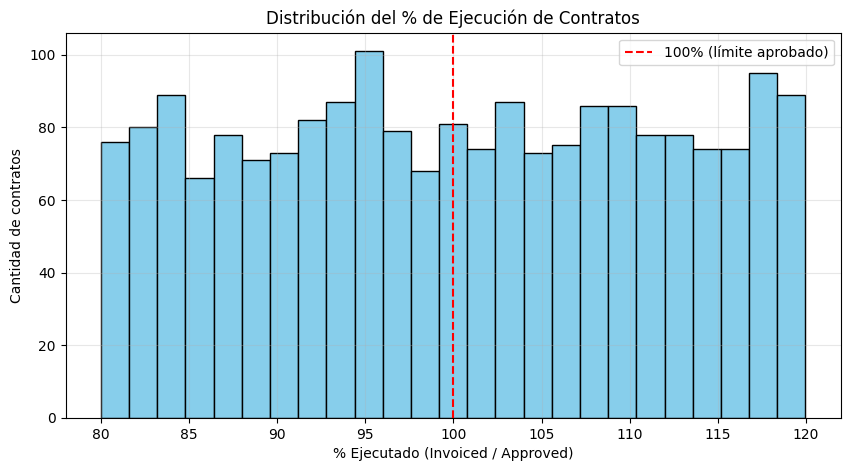

,Contract_ID,Vendor,Category,Approved_Amount_USD,Invoiced_Amount_USD,Execution_Pct,Contract_Status
1482,C-2483,PwC,IT Services,264589,211673,80.00,Active
1662,C-2663,Capgemini,Consulting,172831,138319,80.03,Active (Overrun)
456,C-1457,Accenture,Finance Ops,751767,601819,80.05,Closed
1414,C-2415,Microsoft,Cloud Services,973958,779875,80.07,Active
479,C-1480,Capgemini,Software Licensing,897853,719220,80.10,Closed
969,C-1970,IBM,Software Dev,928393,743680,80.10,Active (Overrun)
679,C-1680,Capgemini,Consulting,371909,297901,80.10,Closed
1677,C-2678,SAP,Cloud Support,347580,278495,80.12,Active (Overrun)
1004,C-2005,PwC,Cloud Services,941709,754640,80.14,Closed
250,C-1251,Microsoft,Software Dev,512559,410766,80.14,Active


In [9]:
# CELDA 3: ¿Cuál es el % de ejecución por contrato?

SMART_GEP_Procurement_exec = SMART_GEP_Procurement.copy()
SMART_GEP_Procurement_exec['Execution_Pct'] = (SMART_GEP_Procurement_exec['Invoiced_Amount_USD'] / SMART_GEP_Procurement_exec['Approved_Amount_USD']) * 100
SMART_GEP_Procurement_exec['Execution_Pct'] = SMART_GEP_Procurement_exec['Execution_Pct'].round(2)

resultado_ejecucion = SMART_GEP_Procurement_exec[['Contract_ID', 'Vendor', 'Category', 
                              'Approved_Amount_USD', 'Invoiced_Amount_USD', 
                              'Execution_Pct', 'Contract_Status']].sort_values('Execution_Pct')

print("Top 10 contratos con mayor % de ejecución")
display(resultado_ejecucion.tail(10))

print("\nTop 10 contratos con menor % de ejecución")
display(resultado_ejecucion.head(10))

# Histograma general
plt.figure(figsize=(10, 5))
plt.hist(SMART_GEP_Procurement_exec['Execution_Pct'], bins=25, edgecolor='black', color='skyblue')
plt.axvline(100, color='red', linestyle='--', label='100% (límite aprobado)')
plt.title('Distribución del % de Ejecución de Contratos')
plt.xlabel('% Ejecutado (Invoiced / Approved)')
plt.ylabel('Cantidad de contratos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Detectá contratos con menos de 50% ejecutado (riesgo por sub-ejecución)**

In [13]:

riesgo_sub = SMART_GEP_Procurement_exec[SMART_GEP_Procurement_exec['Execution_Pct'] < 50]

riesgo_sub = riesgo_sub[['Contract_ID', 'Vendor', 'Category', 
                         'Approved_Amount_USD', 'Invoiced_Amount_USD', 
                         'Execution_Pct', 'Start_Date', 'End_Date', 'Contract_Status']]


today = pd.to_datetime('2025-11-17')

riesgo_sub['Days_Since_Start'] = (today - riesgo_sub['Start_Date']).dt.days
riesgo_sub['Total_Duration_Days'] = (riesgo_sub['End_Date'] - riesgo_sub['Start_Date']).dt.days
riesgo_sub['Pct_Time_Elapsed'] = (riesgo_sub['Days_Since_Start'] / riesgo_sub['Total_Duration_Days']) * 100

riesgo_sub = riesgo_sub.sort_values('Execution_Pct')

print(f"ALERTA: {len(riesgo_sub)} contratos tienen menos del 50% ejecutado")
print("Estos representan riesgo de sub-ejecución o posible abandono")

if len(riesgo_sub) > 0:
    display(riesgo_sub)
    
    # Los peores casos: poco ejecutado pero mucho tiempo ya pasó
    riesgo_sub['Risk_Score'] = riesgo_sub['Pct_Time_Elapsed'] / riesgo_sub['Execution_Pct']
    peores = riesgo_sub.sort_values('Risk_Score', ascending=False).head(8)
    
    print("\nLos 8 contratos MÁS CRÍTICOS (más tiempo pasado vs ejecución):")
    display(peores[['Contract_ID', 'Vendor', 'Execution_Pct', 'Pct_Time_Elapsed', 'Risk_Score', 'Approved_Amount_USD']])
else:
    print("No hay contratos con riesgo de sub-ejecución (<50%)")

ALERTA: 0 contratos tienen menos del 50% ejecutado
Estos representan riesgo de sub-ejecución o posible abandono
No hay contratos con riesgo de sub-ejecución (<50%)


### **target_process**

**¿Cuál proyecto tiene mayor costo en la semana 12?**

In [19]:
semana_12 = target_process[target_process['Week'] == 12]

costo_semana_12 = semana_12.groupby('Project')['Cost_USD'].sum().sort_values(ascending=False)

print("Costo por proyecto en la semana 12")
display(costo_semana_12.to_frame().style.format('${:,.0f}'))

# Proyecto ganador
proyecto_top = costo_semana_12.index[0]
costo_top = costo_semana_12.iloc[0]
print(f"\nProyecto con MAYOR costo en semana 12 → {proyecto_top}")
print(f"Costo: ${costo_top:,.0f}")

Costo por proyecto en la semana 12


,Cost_USD
Project,
Migration2024,"$11,700"
CloudMigration,"$9,165"
DigitalTransformation,"$6,415"
HelpDeskOps,"$4,825"
SAPUpgrade,"$3,040"



Proyecto con MAYOR costo en semana 12 → Migration2024
Costo: $11,700


**¿Cuántas horas totales se registraron por tipo de tarea?**

In [17]:
horas_por_task = target_process.groupby('Task_Type')['Hours_Logged'].sum().sort_values(ascending=False)

print("Horas totales por tipo de tarea")
horas_por_task.to_frame().style.format('{:,}')

Horas totales por tipo de tarea


,Hours_Logged
Task_Type,
Design,"9,616"
Support,"9,449"
Testing,"9,420"
QA,"9,087"
Research,"8,781"
Development,"8,464"


**Detectá anomalías → ¿Algún empleado cargó más de 60 horas en una semana**

In [20]:

# Agrupamos por empleado y semana
horas_por_empleado_semana = target_process.groupby(['Employee_ID', 'Week'])['Hours_Logged'].sum().reset_index()

# Filtramos los que superan 60 horas
anomalias = horas_por_empleado_semana[horas_por_empleado_semana['Hours_Logged'] > 60]

if len(anomalias) > 0:
    print(f"¡ALERTA! {len(anomalias)} registros con más de 60 horas en una semana:")
    display(anomalias.sort_values('Hours_Logged', ascending=False)
            .style.format({'Hours_Logged': '{:,}'})
            )
else:
    print("Ningún empleado superó las 60 horas en una misma semana")

¡ALERTA! 392 registros con más de 60 horas en una semana:


,Employee_ID,Week,Hours_Logged
246,E005,41,302
152,E003,49,294
249,E005,44,281
459,E009,50,271
102,E002,51,270
281,E006,24,261
183,E004,29,257
378,E008,19,257
45,E001,46,253
130,E003,27,242


**Costo total por proyecto (ordenado de mayor a menor)**

Costo TOTAL histórico por proyecto


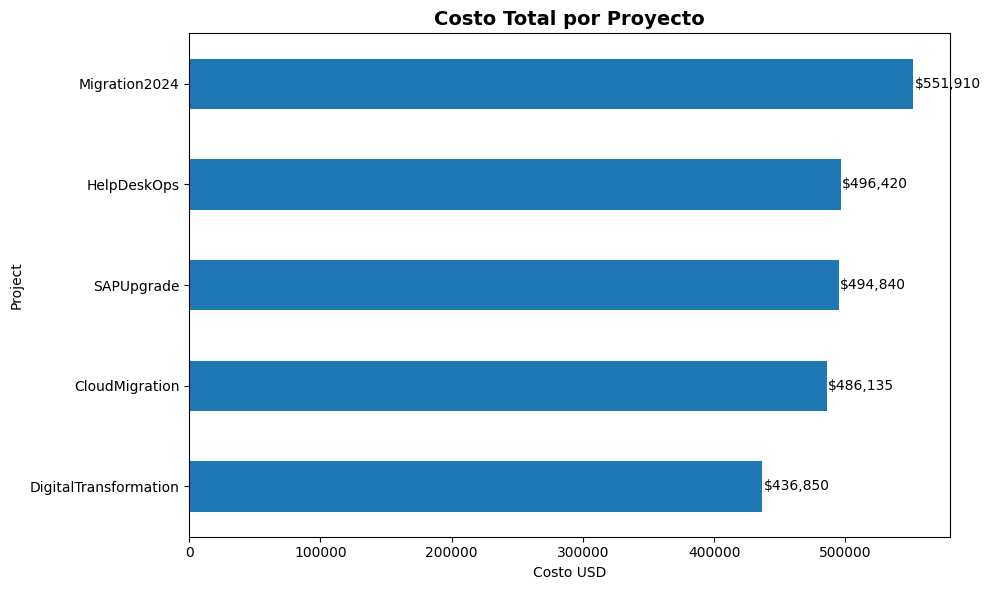

Proyecto más caro hasta hoy: Migration2024 → $551,910


In [21]:

costo_total_proyecto = target_process.groupby('Project')['Cost_USD'].sum().sort_values(ascending=False)

print("Costo TOTAL histórico por proyecto")
costo_total_proyecto.to_frame().style.format('${:,.0f}').background_gradient(cmap='Blues')

# Gráfico rápido
plt.figure(figsize=(10, 6))
costo_total_proyecto.plot(kind='barh', color='#1f77b4')
plt.title('Costo Total por Proyecto', fontweight='bold', fontsize=14)
plt.xlabel('Costo USD')
plt.gca().invert_yaxis()
for i, v in enumerate(costo_total_proyecto):
    plt.text(v + 800, i, f"${v:,.0f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

print(f"Proyecto más caro hasta hoy: {costo_total_proyecto.index[0]} → ${costo_total_proyecto.iloc[0]:,.0f}")

### **¿Migration2024 (contrato C-1003 - EY) está dentro del presupuesto aprobado?**

Contrato C-1003 - EY
Presupuesto aprobado : $577,948
Facturado al proveedor: $541,134
Restante (según factura): $36,814

Proyecto interno: Migration2024
Costo real de horas (Target Process): $551,910

       RESPUESTA DE NEGOCIO
EXCELENTE: El costo interno está DENTRO del presupuesto aprobado
Quedan $26,038 de margen (4.5% del presupuesto aún disponible)
Consumo actual del presupuesto aprobado: 95.5%


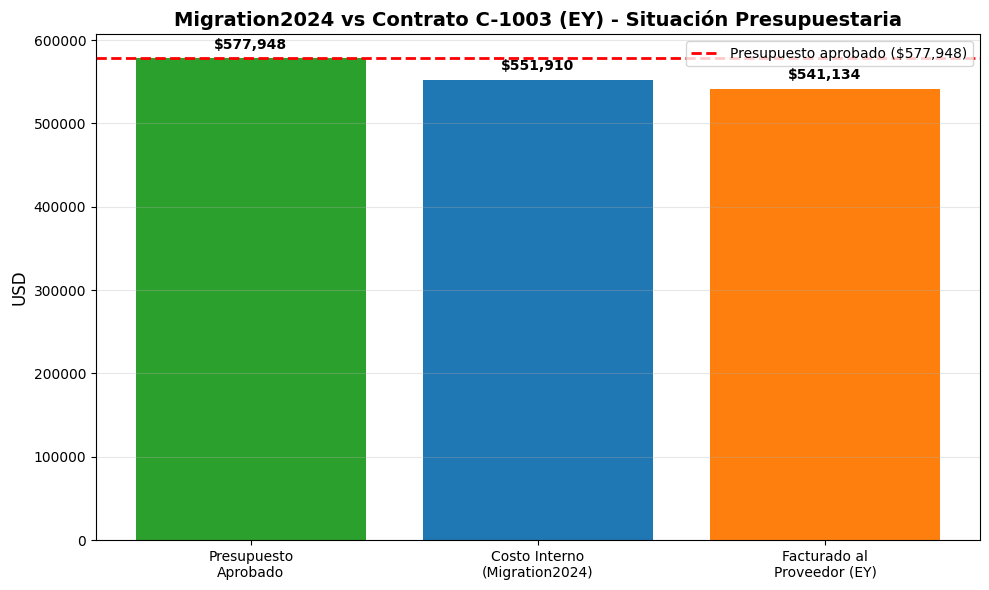

In [23]:
# CELDA: ¿Migration2024 (contrato C-1003 - EY) está dentro del presupuesto aprobado?

# 1. Info del contrato C-1003
contrato = SMART_GEP_Procurement[SMART_GEP_Procurement['Contract_ID'] == 'C-1003'].iloc[0]

approved = contrato['Approved_Amount_USD']
invoiced = contrato['Invoiced_Amount_USD']
vendor   = contrato['Vendor']

print(f"Contrato C-1003 - {vendor}")
print(f"Presupuesto aprobado : ${approved:,.0f}")
print(f"Facturado al proveedor: ${invoiced:,.0f}")
print(f"Restante (según factura): ${approved - invoiced:,.0f}\n")

# 2. Costo interno real del proyecto Migration2024 (horas del equipo)
costo_migration = target_process[target_process['Project'] == 'Migration2024']['Cost_USD'].sum()

print(f"Proyecto interno: Migration2024")
print(f"Costo real de horas (Target Process): ${costo_migration:,.0f}")

# 3. Comparación clave
margen = approved - costo_migration
porcentaje_consumido = (costo_migration / approved) * 100

print("\n" + "="*60)
print("       RESPUESTA DE NEGOCIO")
print("="*60)
if costo_migration <= approved:
    print(f"EXCELENTE: El costo interno está DENTRO del presupuesto aprobado")
    print(f"Quedan ${margen:,.0f} de margen ({100-porcentaje_consumido:.1f}% del presupuesto aún disponible)")
else:
    print(f"ALERTA: El costo interno YA SUPERÓ el presupuesto aprobado del contrato")
    print(f"Overrun interno de ${-margen:,.0f} ({porcentaje_consumido-100:.1f}% por encima)")

print(f"Consumo actual del presupuesto aprobado: {porcentaje_consumido:.1f}%")

# 4. Gráfico rápido de situación
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['Presupuesto\nAprobado', 'Costo Interno\n(Migration2024)', 'Facturado al\nProveedor (EY)'], 
              [approved, costo_migration, invoiced], 
              color=['#2ca02c', '#1f77b4', '#ff7f0e'])

ax.set_ylabel('USD', fontsize=12)
ax.set_title('Migration2024 vs Contrato C-1003 (EY) - Situación Presupuestaria', fontsize=14, fontweight='bold')
ax.yaxis.grid(True, alpha=0.3)

# Etiquetas en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 8000,
            f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# Línea del presupuesto aprobado
ax.axhline(approved, color='red', linestyle='--', linewidth=2, label=f'Presupuesto aprobado (${approved:,.0f})')
ax.legend()
plt.tight_layout()
plt.show()